In [12]:
import pandas as pd
import numpy as np

In [16]:
data = pd.read_csv('content/movie_metadata.csv')
data .head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [18]:
data.shape

(5043, 28)

In [20]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

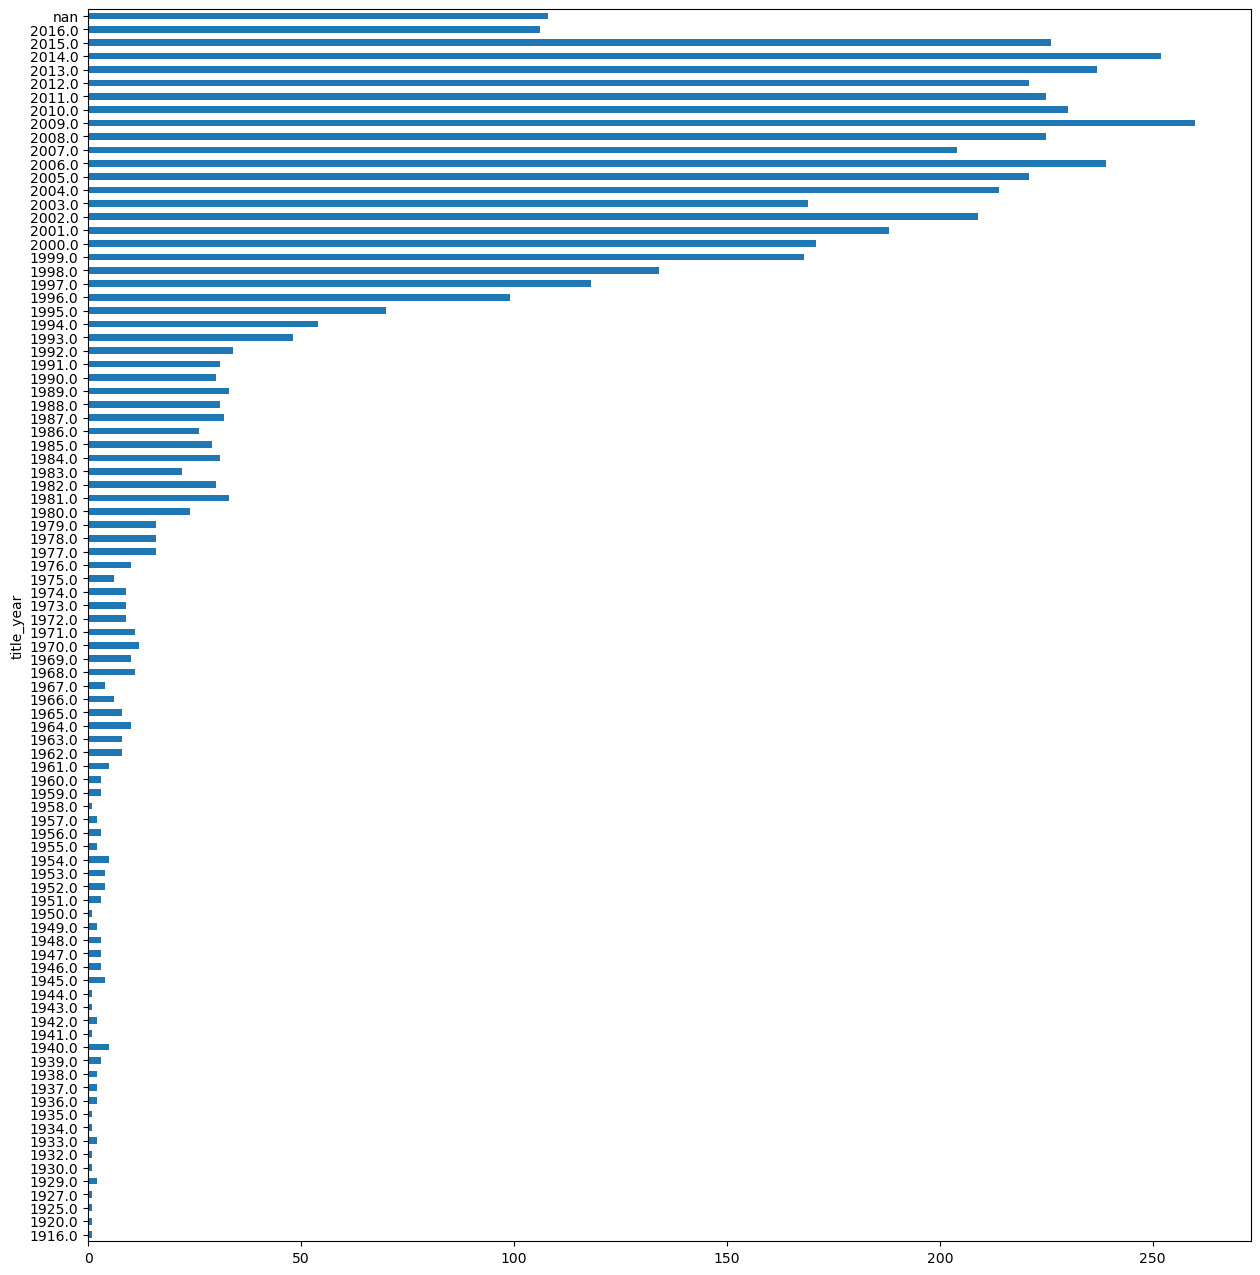

In [22]:
# we have movies only upto 2016
import matplotlib.pyplot as plt
data.title_year.value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(15,16))
plt.show()

In [24]:
# recommendation will be based on these features only
data = data.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [26]:
data.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,NaN,Documentary,Star Wars: Episode VII - The Force Awakens ...


In [28]:
data.isna()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,True,False,False
...,...,...,...,...,...,...
5038,False,False,False,False,False,False
5039,True,False,False,False,False,False
5040,False,False,False,False,False,False
5041,False,False,False,False,False,False


In [30]:
data.isna().sum()

director_name    104
actor_1_name       7
actor_2_name      13
actor_3_name      23
genres             0
movie_title        0
dtype: int64

In [32]:
data['actor_1_name'] = data['actor_1_name'].replace(np.nan, 'unknown')
data['actor_2_name'] = data['actor_2_name'].replace(np.nan, 'unknown')
data['actor_3_name'] = data['actor_3_name'].replace(np.nan, 'unknown')
data['director_name'] = data['director_name'].replace(np.nan, 'unknown')

In [34]:
data.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,Star Wars: Episode VII - The Force Awakens ...


In [36]:
data.isna().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           0
movie_title      0
dtype: int64

In [38]:
data['genres'] = data['genres'].str.replace('|', ' ')

In [40]:
data

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,Star Wars: Episode VII - The Force Awakens ...
...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy Drama,Signed Sealed Delivered
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime Drama Mystery Thriller,The Following
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama Horror Thriller,A Plague So Pleasant
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy Drama Romance,Shanghai Calling


In [42]:
data['movie_title'] = data['movie_title'].str.lower()

In [44]:
data

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens ...
...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy Drama,signed sealed delivered
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime Drama Mystery Thriller,the following
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama Horror Thriller,a plague so pleasant
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy Drama Romance,shanghai calling


In [46]:
data['movie_title'][8]

'avengers: age of ultron\xa0'

In [48]:
# removing the null terminating char at the end
data['movie_title'] = data['movie_title'].apply(lambda x : x[:-1])

In [50]:
data['movie_title'][8]

'avengers: age of ultron'

In [52]:
#let's save the processed dataset
data.to_csv('data1.csv',index=False)

In [55]:
import zipfile
import os

# Specify the path to your zip file
zip_file_path = 'movie.zip'

# Specify the directory where you want to extract the contents
extract_dir = 'content'

# Create the directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Extracted all files to {extract_dir}")


Extracted all files to content


In [167]:
import numpy as np 
import pandas as pd

In [169]:


credits = pd.read_csv('content/credits.csv')
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3...","[{'credit_id': '52fe4284c3a36847f8024f49', 'department': 'Directing', '...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', 'credit_id': '52fe44bfc3a3...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'department': 'Production', ...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'credit_id': '52fe466a92514...","[{'credit_id': '52fe466a9251416c75077a89', 'department': 'Directing', '...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah' Jackson"", 'credit_id': ...","[{'credit_id': '52fe44779251416c91011acb', 'department': 'Directing', '...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', 'credit_id': '52fe44959251...","[{'credit_id': '52fe44959251416c75039ed7', 'department': 'Sound', 'gend...",11862


In [171]:

meta = pd.read_csv('content/movies_metadata.csv')

C:\Users\aaron\AppData\Local\Temp\ipykernel_12672\3794063915.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_csv('content/movies_metadata.csv')


In [173]:
meta

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915Lf...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': ...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his room until Andy's birthda...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id':...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an enchanted board game that open...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'F...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collection', 'poster_path': '/nL...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud between next-door neighbors...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for Love.,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 1074...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the women are holding their brea...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself... and never let you for...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Collection', 'poster_path': ...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,"Just when George Banks has recovered from his daughter's wedding, he re...",...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's In For The Surprise Of Hi...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}]",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a storyline about a cult p...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'name': 'Drama'}, {'id': 53, ...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professional assassin ends up with a...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minister and the other one a h...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [175]:
meta['release_date'] = pd.to_datetime(meta['release_date'], errors='coerce') #If ‘coerce’, then invalid parsing will be set as NaN, if ‘raise’, then invalid parsing will raise an exception, If ‘ignore’, then invalid parsing will return the input

In [177]:
#format the date
meta['year'] = meta['release_date'].dt.year

In [179]:
meta['year'].value_counts().sort_index()

year
1874.0       1
1878.0       1
1883.0       1
1887.0       1
1888.0       2
          ... 
2015.0    1905
2016.0    1604
2017.0     532
2018.0       5
2020.0       1
Name: count, Length: 135, dtype: int64

In [181]:
new_meta = meta.loc[meta.year == 2017,['genres','id','title','year']]

In [183]:
new_meta

,genres,id,title,year
26560,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}, {'id': ...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0
26561,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",141052,Justice League,2017.0
26565,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",284053,Thor: Ragnarok,2017.0
26566,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",283995,Guardians of the Galaxy Vol. 2,2017.0
30536,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'name': 'Action'}, {'id': 12...",245842,The King's Daughter,2017.0
...,...,...,...,...
45398,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]",468707,Thick Lashes of Lauri Mäntyvaara,2017.0
45417,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name': 'Comedy'}, {'id': 28, ...",461297,Cop and a Half: New Recruit,2017.0
45437,"[{'id': 10751, 'name': 'Family'}, {'id': 16, 'name': 'Animation'}, {'id...",455661,In a Heartbeat,2017.0
45453,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': 53, '...",404604,Mom,2017.0


In [185]:
new_meta.dtypes

genres     object
id         object
title      object
year      float64
dtype: object

In [187]:
#converting the "id" to integer
new_meta['id'] = new_meta['id'].astype(int)

In [189]:
#add the new_meta data to the credit data. 
data = pd.merge(new_meta, credits, on='id')

In [191]:
pd.set_option('display.max_colwidth', 75)
data

,genres,id,title,year,cast,crew
0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}, {'id': ...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0,"[{'cast_id': 1, 'character': 'Captain Jack Sparrow', 'credit_id': '52fe...","[{'credit_id': '52fe4c9cc3a36847f8236a65', 'department': 'Production', ..."
1,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",141052,Justice League,2017.0,"[{'cast_id': 2, 'character': 'Bruce Wayne / Batman', 'credit_id': '535e...","[{'credit_id': '55ef66dbc3a3686f1700a52d', 'department': 'Production', ..."
2,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",284053,Thor: Ragnarok,2017.0,"[{'cast_id': 0, 'character': 'Thor Odinson', 'credit_id': '545d46a80e0a...","[{'credit_id': '56a93fa4c3a36872db001e7a', 'department': 'Writing', 'ge..."
3,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",283995,Guardians of the Galaxy Vol. 2,2017.0,"[{'cast_id': 3, 'character': 'Peter Quill / Star-Lord', 'credit_id': '5...","[{'credit_id': '59171547925141583c0315a6', 'department': 'Sound', 'gend..."
4,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'name': 'Action'}, {'id': 12...",245842,The King's Daughter,2017.0,"[{'cast_id': 0, 'character': 'King Louis XIV', 'credit_id': '5431dd580e...","[{'credit_id': '5431de49c3a36825d300007e', 'department': 'Directing', '..."
...,...,...,...,...,...,...
526,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]",468707,Thick Lashes of Lauri Mäntyvaara,2017.0,"[{'cast_id': 0, 'character': 'Satu', 'credit_id': '597e2086c3a368544001...","[{'credit_id': '597e22f69251415d7801c74a', 'department': 'Directing', '..."
527,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name': 'Comedy'}, {'id': 28, ...",461297,Cop and a Half: New Recruit,2017.0,"[{'cast_id': 0, 'character': 'Detective Simmons', 'credit_id': '593ba04...","[{'credit_id': '593ba0c29251410593009be3', 'department': 'Writing', 'ge..."
528,"[{'id': 10751, 'name': 'Family'}, {'id': 16, 'name': 'Animation'}, {'id...",455661,In a Heartbeat,2017.0,[],"[{'credit_id': '5981a15c92514151e0011b51', 'department': 'Sound', 'gend..."
529,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': 53, '...",404604,Mom,2017.0,"[{'cast_id': 1, 'character': 'Devki Sabarwal', 'credit_id': '577809adc3...","[{'credit_id': '58ee55bbc3a3683df500bd0f', 'department': 'Sound', 'gend..."


In [193]:
#convert the "genre", "cast" and "crew" column into a list.  
import ast
data['genres'] = data['genres'].map(lambda x: ast.literal_eval(x))  #the "literal_eval" helps to convert the string into a list
data['cast'] = data['cast'].map(lambda x: ast.literal_eval(x))
data['crew'] = data['crew'].map(lambda x: ast.literal_eval(x))

In [195]:
def make_genresList(x):
    gen = []
    st = " "
    for i in x:
        if i.get('name') == 'Science Fiction':  # renaming the "Science Fiction" to "Sci-Fi" to make it shorter.
            gen.append("Sci-Fi")  
        else:
            gen.append(i.get('name'))
    
    if gen == []:
        return np.NaN
    else:
        return st.join(gen)  # join them together and return the values

data['genres_list'] = data['genres'].map(lambda x: make_genresList(x))


In [197]:

#apply the function on the genre column

data['genres_list'] = data['genres'].map(lambda x: make_genresList(x))

In [199]:
data['genres_list']

0      Adventure Action Fantasy Comedy
1      Action Adventure Fantasy Sci-Fi
2      Action Adventure Fantasy Sci-Fi
3       Action Adventure Comedy Sci-Fi
4             Fantasy Action Adventure
                    ...               
526                     Romance Comedy
527         Crime Comedy Action Family
528    Family Animation Romance Comedy
529               Crime Drama Thriller
530                                NaN
Name: genres_list, Length: 531, dtype: object

In [201]:
def get_actor1(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == []:
        return np.NaN
    else:
        return (casts[0])

In [203]:
data['actor_1_name'] = data['cast'].map(lambda x: get_actor1(x))

In [205]:
def get_actor2(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == [] or len(casts)<=1:
        return np.NaN
    else:
        return (casts[1])

In [207]:
data['actor_2_name'] = data['cast'].map(lambda x: get_actor2(x))

In [209]:
data['actor_2_name']

0       Javier Bardem
1        Henry Cavill
2      Tom Hiddleston
3         Zoe Saldana
4        William Hurt
            ...      
526     Rosa Honkonen
527     Wallace Shawn
528               NaN
529         Sajal Ali
530               NaN
Name: actor_2_name, Length: 531, dtype: object

In [211]:
def get_actor3(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == [] or len(casts)<=2:
        return np.NaN
    else:
        return (casts[2])

In [213]:
data['actor_3_name'] = data['cast'].map(lambda x: get_actor3(x))

In [215]:
data['actor_3_name']

0        Geoffrey Rush
1            Gal Gadot
2       Cate Blanchett
3        Dave Bautista
4      Benjamin Walker
            ...       
526     Tiitus Rantala
527        Gina Holden
528                NaN
529     Akshaye Khanna
530                NaN
Name: actor_3_name, Length: 531, dtype: object

In [217]:
def get_directors(x):
    dt = []
    st = " "
    for i in x:
        if i.get('job') == 'Director':
            dt.append(i.get('name'))
    if dt == []:
        return np.NaN
    else:
        return (st.join(dt))

In [219]:
data['director_name'] = data['crew'].map(lambda x: get_directors(x))

In [221]:
data['director_name']

0      Joachim Rønning Espen Sandberg
1                         Zack Snyder
2                       Taika Waititi
3                          James Gunn
4                       Sean McNamara
                    ...              
526                  Hannaleena Hauru
527             Jonathan A. Rosenbaum
528          Beth David Esteban Bravo
529                      Ravi Udyawar
530                     Daisy Asquith
Name: director_name, Length: 531, dtype: object

In [223]:
movie = data.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres_list','title']]
movie

,director_name,actor_1_name,actor_2_name,actor_3_name,genres_list,title
0,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Adventure Action Fantasy Comedy,Pirates of the Caribbean: Dead Men Tell No Tales
1,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Action Adventure Fantasy Sci-Fi,Justice League
2,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Action Adventure Fantasy Sci-Fi,Thor: Ragnarok
3,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,Action Adventure Comedy Sci-Fi,Guardians of the Galaxy Vol. 2
4,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Fantasy Action Adventure,The King's Daughter
...,...,...,...,...,...,...
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,Thick Lashes of Lauri Mäntyvaara
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,Cop and a Half: New Recruit
528,Beth David Esteban Bravo,NaN,NaN,NaN,Family Animation Romance Comedy,In a Heartbeat
529,Ravi Udyawar,Sridevi Kapoor,Sajal Ali,Akshaye Khanna,Crime Drama Thriller,Mom


In [225]:

movie.isna().sum()

director_name     4
actor_1_name     22
actor_2_name     55
actor_3_name     70
genres_list       7
title             0
dtype: int64

In [227]:
#drop missing values
movie = movie.dropna(how='any')

In [229]:
movie.isna().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres_list      0
title            0
dtype: int64

In [231]:
#renaming
movie = movie.rename(columns={'genres_list':'genres'})
movie = movie.rename(columns={'title':'movie_title'})

In [233]:
#convert all movie titles to lower case
movie['movie_title'] = movie['movie_title'].str.lower()

In [235]:
#combine name for display purpose 
movie['comb'] = movie['actor_1_name'] + ' ' + movie['actor_2_name'] + ' '+ movie['actor_3_name'] + ' '+ movie['director_name'] +' ' + movie['genres']
movie

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Adventure Action Fantasy Comedy,pirates of the caribbean: dead men tell no tales,Johnny Depp Javier Bardem Geoffrey Rush Joachim Rønning Espen Sandberg ...
1,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Action Adventure Fantasy Sci-Fi,justice league,Ben Affleck Henry Cavill Gal Gadot Zack Snyder Action Adventure Fantasy...
2,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Action Adventure Fantasy Sci-Fi,thor: ragnarok,Chris Hemsworth Tom Hiddleston Cate Blanchett Taika Waititi Action Adve...
3,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,Action Adventure Comedy Sci-Fi,guardians of the galaxy vol. 2,Chris Pratt Zoe Saldana Dave Bautista James Gunn Action Adventure Comed...
4,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Fantasy Action Adventure,the king's daughter,Pierce Brosnan William Hurt Benjamin Walker Sean McNamara Fantasy Actio...
...,...,...,...,...,...,...,...
524,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield Jim Strouse Romance Comedy
525,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Louisa Kelly Farhad Mann Romance
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Hannaleena Hauru Romance Co...
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden Jonathan A. Rosenbaum Cr...


In [237]:
old = pd.read_csv('data1.csv')
old

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens
...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy Drama,signed sealed delivered
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime Drama Mystery Thriller,the following
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama Horror Thriller,a plague so pleasant
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy Drama Romance,shanghai calling


In [239]:
old['comb'] = old['actor_1_name'] + ' ' + old['actor_2_name'] + ' '+ old['actor_3_name'] + ' '+ old['director_name'] +' ' + old['genres']

old

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy Drama,signed sealed delivered,Eric Mabius Daphne Zuniga Crystal Lowe Scott Smith Comedy Drama
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime Drama Mystery Thriller,the following,Natalie Zea Valorie Curry Sam Underwood unknown Crime Drama Mystery Thr...
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama Horror Thriller,a plague so pleasant,Eva Boehnke Maxwell Moody David Chandler Benjamin Roberds Drama Horror ...
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy Drama Romance,shanghai calling,Alan Ruck Daniel Henney Eliza Coupe Daniel Hsia Comedy Drama Romance


In [241]:
# Use pd.concat() to combine DataFrames
new = pd.concat([old, movie], ignore_index=True)

# Display the new DataFrame
new

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
5496,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield Jim Strouse Romance Comedy
5497,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Louisa Kelly Farhad Mann Romance
5498,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Hannaleena Hauru Romance Co...
5499,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden Jonathan A. Rosenbaum Cr...


In [243]:
#drop duplicated value
new.drop_duplicates(subset ="movie_title", keep = 'last', inplace = True)
new

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
5496,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield Jim Strouse Romance Comedy
5497,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Louisa Kelly Farhad Mann Romance
5498,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Hannaleena Hauru Romance Co...
5499,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden Jonathan A. Rosenbaum Cr...


In [245]:
new.to_csv('new_data.csv',index=False)

In [247]:
import pandas as pd
import numpy as np

In [250]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2018"
df1 = pd.read_html(link, header=0)[2]
df2 = pd.read_html(link, header=0)[3]
df3 = pd.read_html(link, header=0)[4]
df4 = pd.read_html(link, header=0)[5]

In [252]:
df1

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,J A N U A R Y,5,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / Stage 6 Films,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus ...",[2]
1,J A N U A R Y,5,The Strange Ones,Vertical Entertainment,Christopher Radcliff (director/screenplay); Lauren Wolkstein (director)...,[3]
2,J A N U A R Y,12,The Commuter,Lionsgate / StudioCanal / The Picture Company,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi, Ryan E...",[4]
3,J A N U A R Y,12,Proud Mary,Screen Gems,"Babak Najafi (director); John S. Newman, Christian Swegal, Steve Antin ...",[5]
4,J A N U A R Y,12,Acts of Violence,Lionsgate Premiere,Brett Donowho (director); Nicolas Aaron Mezzanatto (screenplay); Bruce ...,[6]
5,J A N U A R Y,12,Freak Show,IFC Films,"Trudie Styler (director); Patrick J. Clifton, Beth Rigazio (screenplay)...",[7]
6,J A N U A R Y,12,Humor Me,Shout! Factory / Shout! Studios,"Sam Hoffman (director/screenplay); Jemaine Clement, Elliott Gould, Ingr...",[8]
7,J A N U A R Y,19,12 Strong,Warner Bros. Pictures / Alcon Entertainment / Black Label Media / Jerry...,"Nicolai Fuglsig (director); Ted Tally, Peter Craig (screenplay); Chris ...",[9]
8,J A N U A R Y,19,Den of Thieves,STX Entertainment,"Christian Gudegast (director/screenplay); Gerard Butler, Pablo Schreibe...",[10]
9,J A N U A R Y,19,Forever My Girl,Roadside Attractions,"Bethany Ashton Wolf (director/screenplay); Alex Roe, Jessica Rothe, Joh...",[11]


In [254]:
df2

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,A P R I L,6,A Quiet Place,Paramount Pictures / Platinum Dunes / Sunday Night Productions,"John Krasinski (director/screenplay); Bryan Woods, Scott Beck (screenpl...",[60]
1,A P R I L,6,Blockers,Universal Pictures / Good Universe / Point Grey Pictures,"Kay Cannon (director); Brian Kehoe, Jim Kehoe (screenplay); Leslie Mann...",[61]
2,A P R I L,6,You Were Never Really Here,Amazon Studios,"Lynne Ramsay (director/screenplay); Joaquin Phoenix, Judith Roberts, Ek...",[62]
3,A P R I L,6,Chappaquiddick,Entertainment Studios,"John Curran (director); Taylor Allen, Andrew Logan (screenplay); Jason ...",[63]
4,A P R I L,6,The Miracle Season,LD Entertainment,"Sean McNamara (director); David Aaron Cohen, Elissa Matsueda (screenpla...",[64]
5,A P R I L,8,Paterno,HBO Films / Levinson/Fontana / Sony Pictures Television / Edward R. Pre...,"Barry Levinson (director); Debora Cahn, John C. Richards (screenplay); ...",NaN
6,A P R I L,11,Beirut,Bleecker Street,"Brad Anderson (director); Tony Gilroy (screenplay); Jon Hamm, Rosamund ...",[26]
7,A P R I L,13,Rampage,Warner Bros. Pictures / New Line Cinema / Seven Bucks Productions,"Brad Peyton (director); Ryan Engle, Carlton Cuse, Ryan Condal, Adam Szt...",[65]
8,A P R I L,13,Truth or Dare,Universal Pictures / Blumhouse Productions,"Jeff Wadlow (director/screenplay); Michael Reisz, Jillian Jacobs, Chris...",[66]
9,A P R I L,13,The Rider,Sony Pictures Classics,"Chloé Zhao (director/screenplay); Brady Jandreau, Lilly Jandreau, Tim J...",[67]


In [256]:
# Concatenating multiple DataFrames
df = pd.concat([df1, df2, df3, df4], ignore_index=True)
df

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,J A N U A R Y,5,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / Stage 6 Films,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus ...",[2]
1,J A N U A R Y,5,The Strange Ones,Vertical Entertainment,Christopher Radcliff (director/screenplay); Lauren Wolkstein (director)...,[3]
2,J A N U A R Y,12,The Commuter,Lionsgate / StudioCanal / The Picture Company,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi, Ryan E...",[4]
3,J A N U A R Y,12,Proud Mary,Screen Gems,"Babak Najafi (director); John S. Newman, Christian Swegal, Steve Antin ...",[5]
4,J A N U A R Y,12,Acts of Violence,Lionsgate Premiere,Brett Donowho (director); Nicolas Aaron Mezzanatto (screenplay); Bruce ...,[6]
...,...,...,...,...,...,...
243,D E C E M B E R,21,Second Act,STX Entertainment,"Peter Segal (director); Justin Zackham, Elaine Goldsmith-Thomas (screen...",[237]
244,D E C E M B E R,25,Holmes & Watson,Columbia Pictures / Gary Sanchez Productions / Mosiac Media Group,"Etan Cohen (director/screenplay); Will Ferrell, John C. Reilly, Rebecca...",[142]
245,D E C E M B E R,25,Vice,Annapurna Pictures / Plan B Entertainment,"Adam McKay (director/screenplay); Christian Bale, Amy Adams, Steve Care...",[117]
246,D E C E M B E R,25,On the Basis of Sex,Focus Features,"Mimi Leder (director); Daniel Stiepleman (screenplay); Felicity Jones, ...",[207]


In [258]:
pip install tmdbv3api

Note: you may need to restart the kernel to use updated packages.


In [260]:
from tmdbv3api import TMDb
import json
import requests
tmdb = TMDb()
tmdb.api_key = '5abc37d83f41b01fbdb2cc68af8642b9'

In [262]:
from tmdbv3api import Movie
tmdb_movie = Movie()
def get_genre(x): #pass in the title of the movies
    genres = []
    result = tmdb_movie.search(x) #the title will be searched in the tmdb_movie
    movie_id = result[0].id #match the "id" with the "title"
    response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id,tmdb.api_key)) #get the result from the IMDb data
    data_json = response.json() #convert it to a json file
    if data_json['genres']: #in the json file extract the "genre"
        genre_str = " " 
        for i in range(0,len(data_json['genres'])):
            genres.append(data_json['genres'][i]['name']) #then add the "genre" to the empty genre list we created above
        return genre_str.join(genres)
    else:
        np.NaN #return the results but if don't find anything consider it as a missing value

In [265]:
df['genres'] = df['Title'].map(lambda x: get_genre(str(x)))
df

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.,genres
0,J A N U A R Y,5,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / Stage 6 Films,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus ...",[2],Horror Mystery Thriller
1,J A N U A R Y,5,The Strange Ones,Vertical Entertainment,Christopher Radcliff (director/screenplay); Lauren Wolkstein (director)...,[3],Drama Mystery
2,J A N U A R Y,12,The Commuter,Lionsgate / StudioCanal / The Picture Company,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi, Ryan E...",[4],Action Thriller Mystery
3,J A N U A R Y,12,Proud Mary,Screen Gems,"Babak Najafi (director); John S. Newman, Christian Swegal, Steve Antin ...",[5],Thriller Action Crime
4,J A N U A R Y,12,Acts of Violence,Lionsgate Premiere,Brett Donowho (director); Nicolas Aaron Mezzanatto (screenplay); Bruce ...,[6],Action Crime Thriller
...,...,...,...,...,...,...,...
243,D E C E M B E R,21,Second Act,STX Entertainment,"Peter Segal (director); Justin Zackham, Elaine Goldsmith-Thomas (screen...",[237],Romance Comedy
244,D E C E M B E R,25,Holmes & Watson,Columbia Pictures / Gary Sanchez Productions / Mosiac Media Group,"Etan Cohen (director/screenplay); Will Ferrell, John C. Reilly, Rebecca...",[142],Mystery Adventure Comedy Crime
245,D E C E M B E R,25,Vice,Annapurna Pictures / Plan B Entertainment,"Adam McKay (director/screenplay); Christian Bale, Amy Adams, Steve Care...",[117],Thriller Science Fiction Action Adventure
246,D E C E M B E R,25,On the Basis of Sex,Focus Features,"Mimi Leder (director); Daniel Stiepleman (screenplay); Felicity Jones, ...",[207],Drama History


In [267]:
df_2018 = df[['Title','Cast and crew','genres']]
df_2018

,Title,Cast and crew,genres
0,Insidious: The Last Key,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus ...",Horror Mystery Thriller
1,The Strange Ones,Christopher Radcliff (director/screenplay); Lauren Wolkstein (director)...,Drama Mystery
2,The Commuter,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi, Ryan E...",Action Thriller Mystery
3,Proud Mary,"Babak Najafi (director); John S. Newman, Christian Swegal, Steve Antin ...",Thriller Action Crime
4,Acts of Violence,Brett Donowho (director); Nicolas Aaron Mezzanatto (screenplay); Bruce ...,Action Crime Thriller
...,...,...,...
243,Second Act,"Peter Segal (director); Justin Zackham, Elaine Goldsmith-Thomas (screen...",Romance Comedy
244,Holmes & Watson,"Etan Cohen (director/screenplay); Will Ferrell, John C. Reilly, Rebecca...",Mystery Adventure Comedy Crime
245,Vice,"Adam McKay (director/screenplay); Christian Bale, Amy Adams, Steve Care...",Thriller Science Fiction Action Adventure
246,On the Basis of Sex,"Mimi Leder (director); Daniel Stiepleman (screenplay); Felicity Jones, ...",Drama History


In [269]:
def get_director(x):
    if " (director)" in x: 
        return x.split(" (director)")[0]
    elif " (directors)" in x: #"directors" with "s"
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0]

In [273]:
df_2018.loc[:, 'director_name'] = df_2018['Cast and crew'].map(lambda x: get_director(x))

In [275]:
df_2018

,Title,Cast and crew,genres,director_name
0,Insidious: The Last Key,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus ...",Horror Mystery Thriller,Adam Robitel
1,The Strange Ones,Christopher Radcliff (director/screenplay); Lauren Wolkstein (director)...,Drama Mystery,Christopher Radcliff (director/screenplay); Lauren Wolkstein
2,The Commuter,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi, Ryan E...",Action Thriller Mystery,Jaume Collet-Serra
3,Proud Mary,"Babak Najafi (director); John S. Newman, Christian Swegal, Steve Antin ...",Thriller Action Crime,Babak Najafi
4,Acts of Violence,Brett Donowho (director); Nicolas Aaron Mezzanatto (screenplay); Bruce ...,Action Crime Thriller,Brett Donowho
...,...,...,...,...
243,Second Act,"Peter Segal (director); Justin Zackham, Elaine Goldsmith-Thomas (screen...",Romance Comedy,Peter Segal
244,Holmes & Watson,"Etan Cohen (director/screenplay); Will Ferrell, John C. Reilly, Rebecca...",Mystery Adventure Comedy Crime,Etan Cohen
245,Vice,"Adam McKay (director/screenplay); Christian Bale, Amy Adams, Steve Care...",Thriller Science Fiction Action Adventure,Adam McKay
246,On the Basis of Sex,"Mimi Leder (director); Daniel Stiepleman (screenplay); Felicity Jones, ...",Drama History,Mimi Leder


In [277]:
def get_actor1(x):
    return ((x.split("screenplay); ")[-1]).split(", ")[0])

In [281]:
df_2018.loc[:, 'actor_1_name'] = df_2018['Cast and crew'].map(lambda x: get_actor1(x))

In [283]:
def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])

In [287]:
df_2018.loc[:, 'actor_2_name'] = df_2018['Cast and crew'].map(lambda x: get_actor2(x))

In [289]:
def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])

In [291]:
df_2018.loc[:, 'actor_3_name'] = df_2018['Cast and crew'].map(lambda x: get_actor3(x))

In [293]:
df_2018

,Title,Cast and crew,genres,director_name,actor_1_name,actor_2_name,actor_3_name
0,Insidious: The Last Key,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus ...",Horror Mystery Thriller,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell
1,The Strange Ones,Christopher Radcliff (director/screenplay); Lauren Wolkstein (director)...,Drama Mystery,Christopher Radcliff (director/screenplay); Lauren Wolkstein,Lauren Wolkstein (director); Alex Pettyfer,James Freedson-Jackson,Emily Althaus
2,The Commuter,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi, Ryan E...",Action Thriller Mystery,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson
3,Proud Mary,"Babak Najafi (director); John S. Newman, Christian Swegal, Steve Antin ...",Thriller Action Crime,Babak Najafi,Taraji P. Henson,Jahi Di'Allo Winston,Billy Brown
4,Acts of Violence,Brett Donowho (director); Nicolas Aaron Mezzanatto (screenplay); Bruce ...,Action Crime Thriller,Brett Donowho,Bruce Willis,Cole Hauser,Shawn Ashmore
...,...,...,...,...,...,...,...
243,Second Act,"Peter Segal (director); Justin Zackham, Elaine Goldsmith-Thomas (screen...",Romance Comedy,Peter Segal,Jennifer Lopez,Leah Remini,Vanessa Hudgens
244,Holmes & Watson,"Etan Cohen (director/screenplay); Will Ferrell, John C. Reilly, Rebecca...",Mystery Adventure Comedy Crime,Etan Cohen,Will Ferrell,John C. Reilly,Rebecca Hall
245,Vice,"Adam McKay (director/screenplay); Christian Bale, Amy Adams, Steve Care...",Thriller Science Fiction Action Adventure,Adam McKay,Christian Bale,Amy Adams,Steve Carell
246,On the Basis of Sex,"Mimi Leder (director); Daniel Stiepleman (screenplay); Felicity Jones, ...",Drama History,Mimi Leder,Felicity Jones,Armie Hammer,Justin Theroux


In [295]:
df_2018 = df_2018.rename(columns={'Title':'movie_title'})

In [297]:
new_df18 = df_2018.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [299]:
new_df18

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell,Horror Mystery Thriller,Insidious: The Last Key
1,Christopher Radcliff (director/screenplay); Lauren Wolkstein,Lauren Wolkstein (director); Alex Pettyfer,James Freedson-Jackson,Emily Althaus,Drama Mystery,The Strange Ones
2,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson,Action Thriller Mystery,The Commuter
3,Babak Najafi,Taraji P. Henson,Jahi Di'Allo Winston,Billy Brown,Thriller Action Crime,Proud Mary
4,Brett Donowho,Bruce Willis,Cole Hauser,Shawn Ashmore,Action Crime Thriller,Acts of Violence
...,...,...,...,...,...,...
243,Peter Segal,Jennifer Lopez,Leah Remini,Vanessa Hudgens,Romance Comedy,Second Act
244,Etan Cohen,Will Ferrell,John C. Reilly,Rebecca Hall,Mystery Adventure Comedy Crime,Holmes & Watson
245,Adam McKay,Christian Bale,Amy Adams,Steve Carell,Thriller Science Fiction Action Adventure,Vice
246,Mimi Leder,Felicity Jones,Armie Hammer,Justin Theroux,Drama History,On the Basis of Sex


In [301]:
new_df18['actor_2_name'] = new_df18['actor_2_name'].replace(np.nan, 'unknown')
new_df18['actor_3_name'] = new_df18['actor_3_name'].replace(np.nan, 'unknown')

In [303]:
new_df18['movie_title'] = new_df18['movie_title'].str.lower()

In [305]:
new_df18['comb'] = new_df18['actor_1_name'] + ' ' + new_df18['actor_2_name'] + ' '+ new_df18['actor_3_name'] + ' '+ new_df18['director_name'] +' ' + new_df18['genres']
new_df18

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell,Horror Mystery Thriller,insidious: the last key,Lin Shaye Angus Sampson Leigh Whannell Adam Robitel Horror Mystery Thri...
1,Christopher Radcliff (director/screenplay); Lauren Wolkstein,Lauren Wolkstein (director); Alex Pettyfer,James Freedson-Jackson,Emily Althaus,Drama Mystery,the strange ones,Lauren Wolkstein (director); Alex Pettyfer James Freedson-Jackson Emily...
2,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson,Action Thriller Mystery,the commuter,Liam Neeson Vera Farmiga Patrick Wilson Jaume Collet-Serra Action Thril...
3,Babak Najafi,Taraji P. Henson,Jahi Di'Allo Winston,Billy Brown,Thriller Action Crime,proud mary,Taraji P. Henson Jahi Di'Allo Winston Billy Brown Babak Najafi Thriller...
4,Brett Donowho,Bruce Willis,Cole Hauser,Shawn Ashmore,Action Crime Thriller,acts of violence,Bruce Willis Cole Hauser Shawn Ashmore Brett Donowho Action Crime Thriller
...,...,...,...,...,...,...,...
243,Peter Segal,Jennifer Lopez,Leah Remini,Vanessa Hudgens,Romance Comedy,second act,Jennifer Lopez Leah Remini Vanessa Hudgens Peter Segal Romance Comedy
244,Etan Cohen,Will Ferrell,John C. Reilly,Rebecca Hall,Mystery Adventure Comedy Crime,holmes & watson,Will Ferrell John C. Reilly Rebecca Hall Etan Cohen Mystery Adventure C...
245,Adam McKay,Christian Bale,Amy Adams,Steve Carell,Thriller Science Fiction Action Adventure,vice,Christian Bale Amy Adams Steve Carell Adam McKay Thriller Science Ficti...
246,Mimi Leder,Felicity Jones,Armie Hammer,Justin Theroux,Drama History,on the basis of sex,Felicity Jones Armie Hammer Justin Theroux Mimi Leder Drama History


In [307]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2019"
df1 = pd.read_html(link, header=0)[2]
df2 = pd.read_html(link, header=0)[3]
df3 = pd.read_html(link, header=0)[4]
df4 = pd.read_html(link, header=0)[5]

In [311]:
# Concatenate the DataFrames df1, df2, df3, and df4
df = pd.concat([df1, df2, df3, df4], ignore_index=True)

In [313]:
df

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,J A N U A R Y,4,Escape Room,Columbia Pictures / Original Film,"Adam Robitel (director); Bragi F. Schut, Maria Melnik (screenplay); Tay...",[2]
1,J A N U A R Y,4,Rust Creek,IFC Films / Lunacy Productions,"Jen McGowan (director); Julie Lipson (screenplay); Hermione Corfield, J...",[3]
2,J A N U A R Y,4,American Hangman,Hangman Justice Productions,"Wilson Coneybeare (director/screenplay); Donald Sutherland, Vincent Kar...",[4]
3,J A N U A R Y,11,A Dog's Way Home,Columbia Pictures,Charles Martin Smith (director); W. Bruce Cameron (screenplay); Bryce D...,[5]
4,J A N U A R Y,11,The Upside,STX Entertainment,"Neil Burger (director); Jon Hartmere (screenplay); Bryan Cranston, Kevi...",[6]
...,...,...,...,...,...,...
245,D E C E M B E R,25,Spies in Disguise,20th Century Fox Animation / Blue Sky Studios / Chernin Entertainment,"Nick Bruno, Troy Quane (directors); Brad Copeland (screenplay); Will Sm...",[133]
246,D E C E M B E R,25,Little Women,Columbia Pictures / Regency Enterprises,"Greta Gerwig (director/screenplay); Saoirse Ronan, Emma Watson, Florenc...",[226]
247,D E C E M B E R,25,1917,Universal Pictures / DreamWorks Pictures,Sam Mendes (director/screenplay); Krysty Wilson-Cairns (screenplay); Ge...,[227]
248,D E C E M B E R,25,Just Mercy,Warner Bros. Pictures / Participant Media,"Destin Daniel Cretton (director/screenplay), Andrew Lanham (screenplay)...",[228]


In [317]:
df['genres'] = df['Title'].map(lambda x: get_genre(str(x)))

In [318]:
df_2019 = df[['Title','Cast and crew','genres']]
df_2019

,Title,Cast and crew,genres
0,Escape Room,"Adam Robitel (director); Bragi F. Schut, Maria Melnik (screenplay); Tay...",Horror Thriller Mystery
1,Rust Creek,"Jen McGowan (director); Julie Lipson (screenplay); Hermione Corfield, J...",Thriller Drama Action Crime
2,American Hangman,"Wilson Coneybeare (director/screenplay); Donald Sutherland, Vincent Kar...",Thriller
3,A Dog's Way Home,Charles Martin Smith (director); W. Bruce Cameron (screenplay); Bryce D...,Drama Adventure Family
4,The Upside,"Neil Burger (director); Jon Hartmere (screenplay); Bryan Cranston, Kevi...",Comedy Drama
...,...,...,...
245,Spies in Disguise,"Nick Bruno, Troy Quane (directors); Brad Copeland (screenplay); Will Sm...",Animation Action Adventure Comedy Family
246,Little Women,"Greta Gerwig (director/screenplay); Saoirse Ronan, Emma Watson, Florenc...",Drama Romance History
247,1917,Sam Mendes (director/screenplay); Krysty Wilson-Cairns (screenplay); Ge...,War Action Drama History
248,Just Mercy,"Destin Daniel Cretton (director/screenplay), Andrew Lanham (screenplay)...",Drama Crime History


In [319]:
def get_director(x):
    if " (director)" in x:
        return x.split(" (director)")[0]
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0]

In [325]:
df_2019.loc[:, 'director_name'] = df_2019['Cast and crew'].map(lambda x: get_director(str(x)))

In [327]:
def get_actor1(x):
    return ((x.split("screenplay); ")[-1]).split(", ")[0])

In [331]:
df_2019.loc[:, 'actor_1_name'] = df_2019['Cast and crew'].map(lambda x: get_actor1(x))


In [333]:
def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])

In [337]:
df_2019.loc[:, 'actor_2_name'] = df_2019['Cast and crew'].map(lambda x: get_actor2(x))


In [339]:
def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])

In [341]:
df_2019['actor_3_name'] = df_2019['Cast and crew'].map(lambda x: get_actor3(x))

In [343]:
df_2019 = df_2019.rename(columns={'Title':'movie_title'})

In [345]:
new_df19 = df_2019.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [347]:
new_df19['actor_2_name'] = new_df19['actor_2_name'].replace(np.nan, 'unknown')
new_df19['actor_3_name'] = new_df19['actor_3_name'].replace(np.nan, 'unknown')

In [349]:
new_df19['movie_title'] = new_df19['movie_title'].str.lower()

In [351]:
new_df19['comb'] = new_df19['actor_1_name'] + ' ' + new_df19['actor_2_name'] + ' '+ new_df19['actor_3_name'] + ' '+ new_df19['director_name'] +' ' + new_df19['genres']

In [353]:
new_df19

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Adam Robitel,Taylor Russell,Logan Miller,Deborah Ann Woll,Horror Thriller Mystery,escape room,Taylor Russell Logan Miller Deborah Ann Woll Adam Robitel Horror Thrill...
1,Jen McGowan,Hermione Corfield,Jay Paulson,Sean O'Bryan,Thriller Drama Action Crime,rust creek,Hermione Corfield Jay Paulson Sean O'Bryan Jen McGowan Thriller Drama A...
2,Wilson Coneybeare,Donald Sutherland,Vincent Kartheiser,Oliver Dennis,Thriller,american hangman,Donald Sutherland Vincent Kartheiser Oliver Dennis Wilson Coneybeare Th...
3,Charles Martin Smith,Bryce Dallas Howard,Edward James Olmos,Alexandra Shipp,Drama Adventure Family,a dog's way home,Bryce Dallas Howard Edward James Olmos Alexandra Shipp Charles Martin S...
4,Neil Burger,Bryan Cranston,Kevin Hart,Nicole Kidman,Comedy Drama,the upside,Bryan Cranston Kevin Hart Nicole Kidman Neil Burger Comedy Drama
...,...,...,...,...,...,...,...
245,"Nick Bruno, Troy Quane",Will Smith,Tom Holland,Rashida Jones,Animation Action Adventure Comedy Family,spies in disguise,"Will Smith Tom Holland Rashida Jones Nick Bruno, Troy Quane Animation A..."
246,Greta Gerwig,Saoirse Ronan,Emma Watson,Florence Pugh,Drama Romance History,little women,Saoirse Ronan Emma Watson Florence Pugh Greta Gerwig Drama Romance History
247,Sam Mendes,George MacKay,Dean-Charles Chapman,Mark Strong,War Action Drama History,1917,George MacKay Dean-Charles Chapman Mark Strong Sam Mendes War Action Dr...
248,Destin Daniel Cretton,Michael B. Jordan,Jamie Foxx,Brie Larson,Drama Crime History,just mercy,Michael B. Jordan Jamie Foxx Brie Larson Destin Daniel Cretton Drama Cr...


In [357]:
my_df = pd.concat([new_df18, new_df19], ignore_index=True)


In [359]:
old_df = pd.read_csv('content/new_data.csv')
old_df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
5359,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield Jim Strouse Romance Comedy
5360,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Louisa Kelly Farhad Mann Romance
5361,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Hannaleena Hauru Romance Co...
5362,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden Jonathan A. Rosenbaum Cr...


In [361]:
final_df = pd.concat([old_df, my_df], ignore_index=True)


In [363]:
final_df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
5857,"Nick Bruno, Troy Quane",Will Smith,Tom Holland,Rashida Jones,Animation Action Adventure Comedy Family,spies in disguise,"Will Smith Tom Holland Rashida Jones Nick Bruno, Troy Quane Animation A..."
5858,Greta Gerwig,Saoirse Ronan,Emma Watson,Florence Pugh,Drama Romance History,little women,Saoirse Ronan Emma Watson Florence Pugh Greta Gerwig Drama Romance History
5859,Sam Mendes,George MacKay,Dean-Charles Chapman,Mark Strong,War Action Drama History,1917,George MacKay Dean-Charles Chapman Mark Strong Sam Mendes War Action Dr...
5860,Destin Daniel Cretton,Michael B. Jordan,Jamie Foxx,Brie Larson,Drama Crime History,just mercy,Michael B. Jordan Jamie Foxx Brie Larson Destin Daniel Cretton Drama Cr...


In [365]:
final_df.isna().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           0
movie_title      0
comb             0
dtype: int64

In [367]:
final_df.to_csv('final_data.csv',index=False)

In [6]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup as bs
from io import StringIO
import urllib.request

In [8]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2020"

source = urllib.request.urlopen(link).read()
soup = bs(source, 'lxml')

In [10]:
tables = soup.find_all('table',class_='wikitable sortable')

In [12]:
df1 = pd.read_html(StringIO(str(tables[0])))[0]
df2 = pd.read_html(StringIO(str(tables[1])))[0]
df3 = pd.read_html(StringIO(str(tables[2])))[0]
df4 = pd.read_html(StringIO(str(tables[3])))[0]

In [14]:
df = pd.concat([df1, df2, df3, df4], ignore_index=True)
df

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,J A N U A R Y,1,The Grudge,Screen Gems / Stage 6 Films / Ghost House Pict...,Nicolas Pesce (director/screenplay); Andrea Ri...,[2]
1,J A N U A R Y,8,Underwater,20th Century Fox / TSG Entertainment / Chernin...,"William Eubank (director); Brian Duffield, Ada...",[3]
2,J A N U A R Y,8,Like a Boss,Paramount Pictures / Artists First,"Miguel Arteta (director); Sam Pitman, Adam Col...",[4]
3,J A N U A R Y,8,Three Christs,IFC Films,Jon Avnet (director/screenplay); Eric Nazarian...,NaN
4,J A N U A R Y,8,Inherit the Viper,Lionsgate / Barry Films / Tycor International ...,Anthony Jerjen (director); Andrew Crabtree (sc...,[5]
...,...,...,...,...,...,...
271,D E C E M B E R,25,We Can Be Heroes,Netflix / Troublemaker Studios / Double R Prod...,Robert Rodriguez (director/screenplay); Priyan...,[244]
272,D E C E M B E R,25,News of the World,Universal Pictures / Playtone / Perfect World ...,Paul Greengrass (director/screenplay); Luke Da...,[245]
273,D E C E M B E R,25,One Night in Miami...,Amazon Studios,Regina King (director); Kemp Powers (screenpla...,[246]
274,D E C E M B E R,25,Promising Young Woman,Focus Features / FilmNation Entertainment,Emerald Fennell (director/screenplay); Carey M...,[247]


In [16]:
df_2020 = df[['Title','Cast and crew']]

In [18]:
df_2020

,Title,Cast and crew
0,The Grudge,Nicolas Pesce (director/screenplay); Andrea Ri...
1,Underwater,"William Eubank (director); Brian Duffield, Ada..."
2,Like a Boss,"Miguel Arteta (director); Sam Pitman, Adam Col..."
3,Three Christs,Jon Avnet (director/screenplay); Eric Nazarian...
4,Inherit the Viper,Anthony Jerjen (director); Andrew Crabtree (sc...
...,...,...
271,We Can Be Heroes,Robert Rodriguez (director/screenplay); Priyan...
272,News of the World,Paul Greengrass (director/screenplay); Luke Da...
273,One Night in Miami...,Regina King (director); Kemp Powers (screenpla...
274,Promising Young Woman,Emerald Fennell (director/screenplay); Carey M...


In [20]:
!pip install tmdbv3api

In [22]:
from tmdbv3api import TMDb
import json
import requests
tmdb = TMDb()
tmdb.api_key = '5abc37d83f41b01fbdb2cc68af8642b9'

In [35]:
def get_genre(x):
    try:
        genres = []
        result = tmdb_movie.search(x)
        if not result:
            return np.NaN
        
        # Print result to inspect structure
        print(result)
        
        movie_id = result[0].id if hasattr(result[0], 'id') else None
        if not movie_id:
            return np.NaN
        
        response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id, tmdb.api_key))
        data_json = response.json()

        if 'genres' in data_json:
            for genre in data_json['genres']:
                genres.append(genre['name'])
            return ' '.join(genres)
        else:
            return np.NaN
    except Exception as e:
        print(f"Error with title {x}: {e}")
        return np.NaN

In [37]:
df_2020['genres'] = df_2020['Title'].map(lambda x: get_genre(str(x)))

{'page': 1, 'results': [{'adult': False, 'backdrop_path': '/iuW78LWxApCvjLuMebcICwF2owQ.jpg', 'genre_ids': [27, 9648], 'id': 465086, 'original_language': 'en', 'original_title': 'The Grudge', 'overview': 'After a young mother murders her family in her own house, a detective attempts to investigate the mysterious case, only to discover that the house is cursed by a vengeful ghost. Now targeted by the demonic spirits, the detective must do anything to protect herself and her family from harm.', 'popularity': 29.49, 'poster_path': '/vN7JHlHOT9rHNDU27tfYqhABBj5.jpg', 'release_date': '2019-12-31', 'title': 'The Grudge', 'video': False, 'vote_average': 5.451, 'vote_count': 1168}, {'adult': False, 'backdrop_path': '/e8nfiNRrcUfebNLPKtR6dzgV1M1.jpg', 'genre_ids': [27, 9648, 53], 'id': 1970, 'original_language': 'en', 'original_title': 'The Grudge', 'overview': 'An American nurse living and working in Tokyo is exposed to a mysterious supernatural curse, one that locks a person in a powerful rag

C:\Users\aaron\AppData\Local\Temp\ipykernel_2872\2588226551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['genres'] = df_2020['Title'].map(lambda x: get_genre(str(x)))


In [38]:
df_2020

,Title,Cast and crew,genres
0,The Grudge,Nicolas Pesce (director/screenplay); Andrea Ri...,Horror Mystery
1,Underwater,"William Eubank (director); Brian Duffield, Ada...",Horror Science Fiction Action Adventure
2,Like a Boss,"Miguel Arteta (director); Sam Pitman, Adam Col...",Comedy
3,Three Christs,Jon Avnet (director/screenplay); Eric Nazarian...,Drama
4,Inherit the Viper,Anthony Jerjen (director); Andrew Crabtree (sc...,Crime Thriller Drama
...,...,...,...
271,We Can Be Heroes,Robert Rodriguez (director/screenplay); Priyan...,Family Action Fantasy Comedy
272,News of the World,Paul Greengrass (director/screenplay); Luke Da...,Drama Western Adventure
273,One Night in Miami...,Regina King (director); Kemp Powers (screenpla...,Drama
274,Promising Young Woman,Emerald Fennell (director/screenplay); Carey M...,Thriller Crime Drama


In [41]:
def get_director(x):
    if " (director)" in x:
        return x.split(" (director)")[0]
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0]

In [45]:
df_2020.loc[:, 'director_name'] = df_2020['Cast and crew'].map(lambda x: get_director(str(x)))

In [47]:
def get_actor1(x):
    return ((x.split("screenplay); ")[-1]).split(", ")[0])

In [51]:
df_2020.loc[:, 'actor_1_name'] = df_2020['Cast and crew'].map(lambda x: get_actor1(str(x)))


In [53]:
def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])

In [55]:
df_2020.loc[:, 'actor_2_name'] = df_2020['Cast and crew'].map(lambda x: get_actor2(str(x)))


In [57]:
def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])

In [59]:
df_2020.loc[:, 'actor_3_name'] = df_2020['Cast and crew'].map(lambda x: get_actor3(str(x)))


In [61]:
df_2020

,Title,Cast and crew,genres,director_name,actor_1_name,actor_2_name,actor_3_name
0,The Grudge,Nicolas Pesce (director/screenplay); Andrea Ri...,Horror Mystery,Nicolas Pesce,Andrea Riseborough,Demián Bichir,John Cho
1,Underwater,"William Eubank (director); Brian Duffield, Ada...",Horror Science Fiction Action Adventure,William Eubank,Kristen Stewart,Vincent Cassel,Jessica Henwick
2,Like a Boss,"Miguel Arteta (director); Sam Pitman, Adam Col...",Comedy,Miguel Arteta,Tiffany Haddish,Rose Byrne,Salma Hayek
3,Three Christs,Jon Avnet (director/screenplay); Eric Nazarian...,Drama,Jon Avnet,Richard Gere,Peter Dinklage,Walton Goggins
4,Inherit the Viper,Anthony Jerjen (director); Andrew Crabtree (sc...,Crime Thriller Drama,Anthony Jerjen,Josh Hartnett,Margarita Levieva,Chandler Riggs
...,...,...,...,...,...,...,...
271,We Can Be Heroes,Robert Rodriguez (director/screenplay); Priyan...,Family Action Fantasy Comedy,Robert Rodriguez,Priyanka Chopra Jonas,Pedro Pascal,YaYa Gosselin
272,News of the World,Paul Greengrass (director/screenplay); Luke Da...,Drama Western Adventure,Paul Greengrass,Tom Hanks,Helena Zengel,NaN
273,One Night in Miami...,Regina King (director); Kemp Powers (screenpla...,Drama,Regina King,Kingsley Ben-Adir,Eli Goree,Aldis Hodge
274,Promising Young Woman,Emerald Fennell (director/screenplay); Carey M...,Thriller Crime Drama,Emerald Fennell,Carey Mulligan,Bo Burnham,Alison Brie


In [63]:
df_2020 = df_2020.rename(columns={'Title':'movie_title'})

In [65]:
new_df20 = df_2020.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [67]:
new_df20

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,Nicolas Pesce,Andrea Riseborough,Demián Bichir,John Cho,Horror Mystery,The Grudge
1,William Eubank,Kristen Stewart,Vincent Cassel,Jessica Henwick,Horror Science Fiction Action Adventure,Underwater
2,Miguel Arteta,Tiffany Haddish,Rose Byrne,Salma Hayek,Comedy,Like a Boss
3,Jon Avnet,Richard Gere,Peter Dinklage,Walton Goggins,Drama,Three Christs
4,Anthony Jerjen,Josh Hartnett,Margarita Levieva,Chandler Riggs,Crime Thriller Drama,Inherit the Viper
...,...,...,...,...,...,...
271,Robert Rodriguez,Priyanka Chopra Jonas,Pedro Pascal,YaYa Gosselin,Family Action Fantasy Comedy,We Can Be Heroes
272,Paul Greengrass,Tom Hanks,Helena Zengel,NaN,Drama Western Adventure,News of the World
273,Regina King,Kingsley Ben-Adir,Eli Goree,Aldis Hodge,Drama,One Night in Miami...
274,Emerald Fennell,Carey Mulligan,Bo Burnham,Alison Brie,Thriller Crime Drama,Promising Young Woman


In [69]:
new_df20['comb'] = new_df20['actor_1_name'] + ' ' + new_df20['actor_2_name'] + ' '+ new_df20['actor_3_name'] + ' '+ new_df20['director_name'] +' ' + new_df20['genres']

In [71]:
new_df20.isna().sum()

director_name     0
actor_1_name      0
actor_2_name      5
actor_3_name     28
genres            2
movie_title       0
comb             29
dtype: int64

In [73]:
new_df20 = new_df20.dropna(how='any')

In [75]:
new_df20.isna().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           0
movie_title      0
comb             0
dtype: int64

In [77]:
new_df20.loc[:, 'movie_title'] = new_df20['movie_title'].str.lower()


In [79]:
new_df20

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Nicolas Pesce,Andrea Riseborough,Demián Bichir,John Cho,Horror Mystery,the grudge,Andrea Riseborough Demián Bichir John Cho Nico...
1,William Eubank,Kristen Stewart,Vincent Cassel,Jessica Henwick,Horror Science Fiction Action Adventure,underwater,Kristen Stewart Vincent Cassel Jessica Henwick...
2,Miguel Arteta,Tiffany Haddish,Rose Byrne,Salma Hayek,Comedy,like a boss,Tiffany Haddish Rose Byrne Salma Hayek Miguel ...
3,Jon Avnet,Richard Gere,Peter Dinklage,Walton Goggins,Drama,three christs,Richard Gere Peter Dinklage Walton Goggins Jon...
4,Anthony Jerjen,Josh Hartnett,Margarita Levieva,Chandler Riggs,Crime Thriller Drama,inherit the viper,Josh Hartnett Margarita Levieva Chandler Riggs...
...,...,...,...,...,...,...,...
270,Pete Docter,Jamie Foxx,Tina Fey,Graham Norton,Animation Family Comedy Fantasy,soul,Jamie Foxx Tina Fey Graham Norton Pete Docter ...
271,Robert Rodriguez,Priyanka Chopra Jonas,Pedro Pascal,YaYa Gosselin,Family Action Fantasy Comedy,we can be heroes,Priyanka Chopra Jonas Pedro Pascal YaYa Gossel...
273,Regina King,Kingsley Ben-Adir,Eli Goree,Aldis Hodge,Drama,one night in miami...,Kingsley Ben-Adir Eli Goree Aldis Hodge Regina...
274,Emerald Fennell,Carey Mulligan,Bo Burnham,Alison Brie,Thriller Crime Drama,promising young woman,Carey Mulligan Bo Burnham Alison Brie Emerald ...


In [81]:
old_df = pd.read_csv('final_data.csv')

In [83]:
old_df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James C...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore ...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman ...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens ...,Doug Walker Rob Walker unknown Doug Walker Doc...
...,...,...,...,...,...,...,...
5857,"Nick Bruno, Troy Quane",Will Smith,Tom Holland,Rashida Jones,Animation Action Adventure Comedy Family,spies in disguise,Will Smith Tom Holland Rashida Jones Nick Brun...
5858,Greta Gerwig,Saoirse Ronan,Emma Watson,Florence Pugh,Drama Romance History,little women,Saoirse Ronan Emma Watson Florence Pugh Greta ...
5859,Sam Mendes,George MacKay,Dean-Charles Chapman,Mark Strong,War Action Drama History,1917,George MacKay Dean-Charles Chapman Mark Strong...
5860,Destin Daniel Cretton,Michael B. Jordan,Jamie Foxx,Brie Larson,Drama Crime History,just mercy,Michael B. Jordan Jamie Foxx Brie Larson Desti...


In [85]:
final_df = pd.concat([old_df, new_df20], ignore_index=True)


In [87]:
final_df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James C...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore ...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman ...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens ...,Doug Walker Rob Walker unknown Doug Walker Doc...
...,...,...,...,...,...,...,...
6104,Pete Docter,Jamie Foxx,Tina Fey,Graham Norton,Animation Family Comedy Fantasy,soul,Jamie Foxx Tina Fey Graham Norton Pete Docter ...
6105,Robert Rodriguez,Priyanka Chopra Jonas,Pedro Pascal,YaYa Gosselin,Family Action Fantasy Comedy,we can be heroes,Priyanka Chopra Jonas Pedro Pascal YaYa Gossel...
6106,Regina King,Kingsley Ben-Adir,Eli Goree,Aldis Hodge,Drama,one night in miami...,Kingsley Ben-Adir Eli Goree Aldis Hodge Regina...
6107,Emerald Fennell,Carey Mulligan,Bo Burnham,Alison Brie,Thriller Crime Drama,promising young woman,Carey Mulligan Bo Burnham Alison Brie Emerald ...


In [89]:
final_df.to_csv('main_data.csv',index=False)

In [8]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Load the dataset
file_path = 'main_data.csv'  
df = pd.read_csv(file_path)

print(df.head())

# Step 2: Preprocessing (Vectorize the 'genres' column)
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['genres'])

# Step 3: Compute cosine similarity between movies based on genres
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Step 4: Define a function to recommend movies based on the cosine similarity
def recommend_movies(title, cosine_sim=cosine_sim, df=df, threshold=0.7):
    # Get the index of the movie that matches the title
    indices = pd.Series(df.index, index=df['movie_title']).drop_duplicates()
    idx = indices[title]
    
    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Filter out movies with a cosine similarity score below the threshold
    sim_scores = [score for score in sim_scores if score[1] >= threshold]
    
    # Sort the remaining movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the scores of the top most similar movies
    sim_scores = sim_scores[1:11]  
    
    # Get the movie indices for the recommended movies
    movie_indices = [i[0] for i in sim_scores]
    
    # Return the top similar movies
    return df['movie_title'].iloc[movie_indices]

print(recommend_movies('avatar'))

# Step 5: user preferences and recommendations for testing
user_preferences = {
    'avatar': ['man of steel', 'star wars: episode iii - revenge of the sith', 
               'the dark knight rises', 'the amazing spider-man 2'],
    'spectre': ['skyfall', 'casino royale', 'quantum of solace']
}

model_recommendations = {
    'avatar': ['man of steel', 'the amazing spider-man 2', 'star wars: episode iii - revenge of the sith', 
               'star wars: episode ii - attack of the clones', 'highlander: endgame'],
    'spectre': ['casino royale', 'quantum of solace', 'the bourne identity', 'skyfall']
}

# Step 6: Function to calculate precision and recall for testing
def calculate_precision_recall(user_prefs, model_recs):
    results = {}
    for movie in user_prefs:
        true_positives = len(set(user_prefs[movie]).intersection(model_recs[movie]))
        false_positives = len(set(model_recs[movie]) - set(user_prefs[movie]))
        false_negatives = len(set(user_prefs[movie]) - set(model_recs[movie]))

        # Precision = True Positives / (True Positives + False Positives)
        precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
        
        # Recall = True Positives / (True Positives + False Negatives)
        recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0

        results[movie] = {'precision': precision, 'recall': recall}
    
    return pd.DataFrame(results).transpose()

# Calculate precision and recall for the example movies
precision_recall_df = calculate_precision_recall(user_preferences, model_recommendations)

# Displaying the results
print(precision_recall_df)


       director_name     actor_1_name      actor_2_name          actor_3_name  \
0      James Cameron      CCH Pounder  Joel David Moore             Wes Studi   
1     Gore Verbinski      Johnny Depp     Orlando Bloom        Jack Davenport   
2         Sam Mendes  Christoph Waltz      Rory Kinnear      Stephanie Sigman   
3  Christopher Nolan        Tom Hardy    Christian Bale  Joseph Gordon-Levitt   
4        Doug Walker      Doug Walker        Rob Walker               unknown   

                            genres  \
0  Action Adventure Fantasy Sci-Fi   
1         Action Adventure Fantasy   
2        Action Adventure Thriller   
3                  Action Thriller   
4                      Documentary   

                                         movie_title  \
0                                             avatar   
1           pirates of the caribbean: at world's end   
2                                            spectre   
3                              the dark knight rises   
4  s

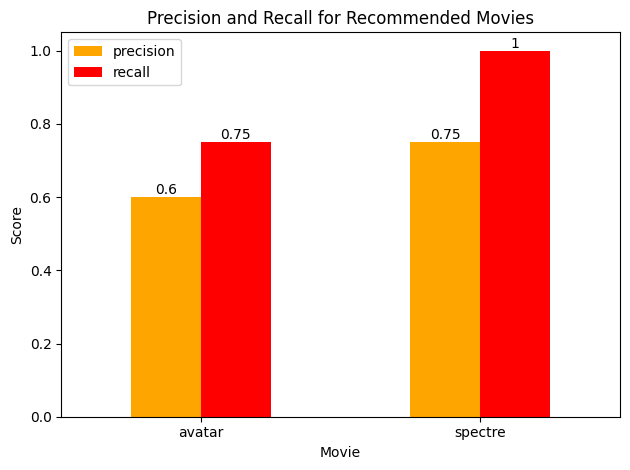

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for precision and recall from your system's output
precision_recall_df = pd.DataFrame({
    'precision': [0.60, 0.75],
    'recall': [0.75, 1.00]
}, index=['avatar', 'spectre'])

# Plotting precision and recall for both movies
fig, ax = plt.subplots()
precision_recall_df.plot(kind='bar', ax=ax, color=['orange', 'red'])

# Setting labels and title
ax.set_title('Precision and Recall for Recommended Movies')
ax.set_xlabel('Movie')
ax.set_ylabel('Score')

# Adding data labels above the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

# Display the plot
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [11]:
import pandas as pd
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Load the dataset
file_path = 'main_data.csv'  
df = pd.read_csv(file_path)

print(df.head())

# Step 2: Preprocessing (Vectorize the 'genres' column)
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['genres'])

# Step 3: Compute cosine similarity between movies based on genres
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Step 4: Define a function to recommend movies based on the cosine similarity
def recommend_movies(title, cosine_sim=cosine_sim, df=df, threshold=0.7):
    # Get the index of the movie that matches the title
    indices = pd.Series(df.index, index=df['movie_title']).drop_duplicates()
    idx = indices[title]
    
    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Filter out movies with a cosine similarity score below the threshold
    sim_scores = [score for score in sim_scores if score[1] >= threshold]
    
    # Sort the remaining movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the scores of the top most similar movies
    sim_scores = sim_scores[1:11]  # Exclude the input movie itself
    
    # Get the movie indices for the recommended movies
    movie_indices = [i[0] for i in sim_scores]
    
    # Return the top similar movies
    return df['movie_title'].iloc[movie_indices]

# Test the recommendation system
print(recommend_movies('avatar'))

# Step 5: Automatically generate random user preferences and recommendations

# Define a function to randomly select movies for user preferences
def get_random_preferences(df, num_movies=10):
    return random.sample(list(df['movie_title']), num_movies)

# Define a function to randomly generate recommendations based on the dataset
def get_random_recommendations(df, num_movies=10):
    return random.sample(list(df['movie_title']), num_movies)

# Generate random user preferences and model recommendations for testing
user_preferences = {
    'avatar': get_random_preferences(df, num_movies=10),
    'spectre': get_random_preferences(df, num_movies=10)
}

model_recommendations = {
    'avatar': get_random_recommendations(df, num_movies=10),
    'spectre': get_random_recommendations(df, num_movies=10)
}

# Step 6: Function to calculate precision and recall for testing
def calculate_precision_recall(user_prefs, model_recs):
    results = {}
    for movie in user_prefs:
        true_positives = len(set(user_prefs[movie]).intersection(model_recs[movie]))
        false_positives = len(set(model_recs[movie]) - set(user_prefs[movie]))
        false_negatives = len(set(user_prefs[movie]) - set(model_recs[movie]))

        # Precision = True Positives / (True Positives + False Positives)
        precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
        
        # Recall = True Positives / (True Positives + False Negatives)
        recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0

        results[movie] = {'precision': precision, 'recall': recall}
    
    return pd.DataFrame(results).transpose()

# Calculate precision and recall for the random example movies
precision_recall_df = calculate_precision_recall(user_preferences, model_recommendations)

# Displaying the results
print(precision_recall_df)


       director_name     actor_1_name      actor_2_name          actor_3_name  \
0      James Cameron      CCH Pounder  Joel David Moore             Wes Studi   
1     Gore Verbinski      Johnny Depp     Orlando Bloom        Jack Davenport   
2         Sam Mendes  Christoph Waltz      Rory Kinnear      Stephanie Sigman   
3  Christopher Nolan        Tom Hardy    Christian Bale  Joseph Gordon-Levitt   
4        Doug Walker      Doug Walker        Rob Walker               unknown   

                            genres  \
0  Action Adventure Fantasy Sci-Fi   
1         Action Adventure Fantasy   
2        Action Adventure Thriller   
3                  Action Thriller   
4                      Documentary   

                                         movie_title  \
0                                             avatar   
1           pirates of the caribbean: at world's end   
2                                            spectre   
3                              the dark knight rises   
4  s

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Load the movie metadata dataset (with genres)
file_path = 'main_data.csv'  # Adjust this path to the correct file location
df = pd.read_csv(file_path)

# Step 2: Precompute TF-IDF matrix for movie genres
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['genres'])

# Step 3: Compute cosine similarity between movies based on genres
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Step 4: Define a function to recommend movies based on genre similarity
def recommend_movies(title, cosine_sim=cosine_sim, df=df, threshold=0.7):
    """Recommend movies similar to the given movie title."""
    indices = pd.Series(df.index, index=df['movie_title']).drop_duplicates()
    
    # If the movie title is not in the dataset, return an empty list
    if title not in indices:
        return []
    
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the remaining movies based on their similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the indices of the top similar movies (excluding the input movie)
    sim_scores = sim_scores[1:11]  # Skip the first one (itself)
    movie_indices = [i[0] for i in sim_scores]
    
    return df['movie_title'].iloc[movie_indices]

# Step 5: Test recommendations for a specific movie (e.g., 'Avatar')
recommended_movies = recommend_movies('avatar')
print("Movies recommended for 'Avatar':")
print(recommended_movies)

# Step 6: Accuracy testing
# Define a ground truth set of movies that are known to be similar to 'Avatar' (you would use a predefined list)
ground_truth = ['star wars: episode iii - revenge of the sith', 'man of steel', 'the dark knight rises']

# Calculate precision and recall based on the ground truth
def calculate_accuracy(recommended, ground_truth):
    true_positives = len(set(recommended).intersection(ground_truth))
    false_positives = len(set(recommended) - set(ground_truth))
    false_negatives = len(set(ground_truth) - set(recommended))

    # Precision = True Positives / (True Positives + False Positives)
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    
    # Recall = True Positives / (True Positives + False Negatives)
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0

    return {"precision": precision, "recall": recall}

# Step 7: Measure accuracy for the recommendations
accuracy = calculate_accuracy(recommended_movies, ground_truth)
print("Accuracy for 'Avatar':", accuracy)



Movies recommended for 'Avatar':
14                                        man of steel
33                            the amazing spider-man 2
214       star wars: episode iii - revenge of the sith
215       star wars: episode ii - attack of the clones
218          star wars: episode i - the phantom menace
478              the league of extraordinary gentlemen
1464        star wars: episode vi - return of the jedi
1960    star wars: episode v - the empire strikes back
2574                               highlander: endgame
2903                star wars: episode iv - a new hope
Name: movie_title, dtype: object
Accuracy for 'Avatar': {'precision': 0.2, 'recall': 0.6666666666666666}


In [12]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Load the movie dataset (adjust the file path as needed)
file_path = 'main_data.csv'
df = pd.read_csv(file_path)

# Ensure that the 'genres' and 'movie_title' columns are in the dataset
df = df[['movie_title', 'genres']]


In [13]:
def calculate_precision(recommended_movies, ground_truth):
    """Calculate precision for the recommendations."""
    true_positives = len(set(recommended_movies).intersection(ground_truth))
    if len(recommended_movies) == 0:
        return 0
    return true_positives / len(recommended_movies)



In [16]:
def k_fold_cross_validation(df, k=5):
    """Perform k-fold cross-validation on a content-based recommendation system."""
    
    kf = KFold(n_splits=k, shuffle=True, random_state=42)  # Shuffle the data and split it into k folds
    fold = 1
    results = []
    
    for train_index, test_index in kf.split(df):
        # Split data into train and test sets for this fold
        train_data, test_data = df.iloc[train_index], df.iloc[test_index]
        
        # Reset index for the training data to avoid out-of-bounds errors
        train_data = train_data.reset_index(drop=True)

        # Step 1: Train the recommendation system using the train_data (genres)
        tfidf = TfidfVectorizer(stop_words='english')
        tfidf_matrix_train = tfidf.fit_transform(train_data['genres'])
        cosine_sim_train = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)
        
        # Step 2: Test the recommendation system using the test_data
        precision_list = []
        for movie_title in test_data['movie_title']:
            # Generate recommendations for the movie
            recommended_movies = recommend_movies(movie_title, cosine_sim_train, train_data)
            
            # Define a "ground truth" list of movies with the same genres (or you can use a more sophisticated ground truth)
            ground_truth = test_data[test_data['genres'] == test_data.loc[test_data['movie_title'] == movie_title, 'genres'].values[0]]['movie_title']
            
            # Calculate precision for this movie
            precision = calculate_precision(recommended_movies, ground_truth)
            precision_list.append(precision)
        
        # Calculate the average precision for this fold
        avg_precision = np.mean(precision_list)
        print(f"Fold {fold}: Average Precision = {avg_precision}")
        results.append(avg_precision)
        fold += 1
    
    # Calculate the overall average precision across all folds
    overall_precision = np.mean(results)
    print(f"\nOverall Average Precision after {k} folds = {overall_precision}")
    return overall_precision



In [17]:
def recommend_movies(title, cosine_sim, df, top_n=10):
    """Recommend movies similar to the given movie title."""
    indices = pd.Series(df.index, index=df['movie_title']).drop_duplicates()
    
    # If the movie title is not in the dataset, return an empty list
    if title not in indices:
        return []
    
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the remaining movies based on their similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the indices of the top similar movies (excluding the input movie)
    sim_scores = sim_scores[1:top_n+1]  # Skip the first one (itself)
    movie_indices = [i[0] for i in sim_scores]
    
    return df['movie_title'].iloc[movie_indices]


In [18]:
# Perform k-fold cross-validation with k=5
k_fold_cross_validation(df, k=5)


Fold 1: Average Precision = 0.00024958402662229623
Fold 2: Average Precision = 0.0
Fold 3: Average Precision = 8.319467554076539e-05
Fold 4: Average Precision = 0.00016638935108153079
Fold 5: Average Precision = 0.0005823627287853578

Overall Average Precision after 5 folds = 0.00021630615640599003


np.float64(0.00021630615640599003)

In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load your dataset
data = pd.read_csv('main_data.csv')

# Assuming you don't have true labels in your dataset, you can generate mock labels
data['true_label'] = np.random.choice([0, 1], size=len(data))

data['comb'] = data['genres']

# Function to create the similarity matrix using TF-IDF based on genres (or added features)
def create_similarity(train_data):
    tfidf = TfidfVectorizer(tokenizer=lambda x: x.split())  # Use space-separated genre tokens
    count_matrix = tfidf.fit_transform(train_data['comb'])  # Convert genres to TF-IDF matrix
    similarity = cosine_similarity(count_matrix)  # Compute cosine similarity
    return similarity

# Recommendation function based on cosine similarity
def rcmd(movie_title, train_data, similarity, num_recommendations=10):
    movie_title = movie_title.lower()
    
    # Check if the movie exists in the training data
    if movie_title not in train_data['movie_title'].unique():
        return []
    else:
        i = train_data.loc[train_data['movie_title'] == movie_title].index[0]
        if i >= similarity.shape[0]:  # Prevent index out of bounds error
            return []
        
        lst = list(enumerate(similarity[i]))
        lst = sorted(lst, key=lambda x: x[1], reverse=True)
        lst = lst[1:num_recommendations + 1]  # Exclude the first item (the movie itself)
        recommended_movies = [train_data['movie_title'].iloc[i[0]] for i in lst if i[1] > 0]  # Filter out zero similarities
        return recommended_movies

# Function to test recommendations for a specific movie title and compute precision & recall
def test_single_movie_with_precision_recall(movie_title, data, test_size=0.1):
    # Adjust the train-test split by modifying the test_size parameter
    train_data, test_data = train_test_split(data, test_size=test_size, random_state=42)
    similarity = create_similarity(train_data)
    
    # Get top 10 recommendations for the specified movie title
    recommended_movies = rcmd(movie_title, train_data, similarity, num_recommendations=10)
    
    # Find the relevant movies in the test set (actual labels)
    relevant_movies = test_data[test_data['true_label'] == 1]['movie_title'].values
    
    # Compare based on genre overlap (at least one similar genre)
    tp, fp, fn = 0, 0, 0
    
    # Convert genres to sets for easier comparison
    train_data['genre_set'] = train_data['genres'].apply(lambda x: set(x.split()))
    test_data['genre_set'] = test_data['genres'].apply(lambda x: set(x.split()))
    
    for movie in recommended_movies:
        if movie in train_data['movie_title'].values:
            recommended_genres = train_data[train_data['movie_title'] == movie]['genre_set'].values[0]
            relevant_movie = any(
                recommended_genres & test_data[test_data['movie_title'] == relevant_movie]['genre_set'].values[0]
                for relevant_movie in relevant_movies
            )
            if relevant_movie:
                tp += 1  # True Positive: At least one genre matches
            else:
                fp += 1  # False Positive: No genres match
    
    # False Negatives: Relevant movies not recommended
    for relevant_movie in relevant_movies:
        relevant_genres = test_data[test_data['movie_title'] == relevant_movie]['genre_set'].values[0]
        not_recommended = all(
            not (relevant_genres & train_data[train_data['movie_title'] == movie]['genre_set'].values[0])
            for movie in recommended_movies
        )
        if not_recommended:
            fn += 1  # False Negative: No recommended movie matches
    
    # Precision and Recall Calculations
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    
    # Print genres of recommended movies and relevant movies for comparison
    print(f"Top 10 similar movies to '{movie_title}':")
    for idx, movie in enumerate(recommended_movies, start=1):
        print(f"{idx}. {movie}")
    
    print("\n--- Evaluation Metrics ---")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")

# Specify the movie title you want to test
test_movie = "avatar"  # You can replace this with any movie title from your dataset

test_single_movie_with_precision_recall(test_movie, data, test_size=0.2)  


c:\Users\aaron\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Top 10 similar movies to 'avatar':
1. glass
2. a quiet place part ii
3. fast color
4. replicas
5. ad astra
6. sonic the hedgehog
7. i am mother
8. captive state
9. future world
10. hotel artemis

--- Evaluation Metrics ---
Precision: 1.0
Recall: 0.24390243902439024


             Movie  Precision    Recall  F1-Score  Accuracy  \
0           Avatar        1.0  0.588235  0.740741  0.988746   
1        Inception        1.0  0.285714  0.444444  0.960938   
2       The Matrix        1.0  0.142857  0.250000  0.911111   
3  The Dark Knight        1.0  0.454545  0.625000  0.980861   
4     Interstellar        1.0  0.256410  0.408163  0.954969   

                                  Recommended Movies  
0  phenomenon, the game plan, critical care, the ...  
1  anything else, deconstructing harry, hollywood...  
2  clear and present danger, salt, the bone colle...  
3  sea of love, the hole, we have your husband, l...  
4  never back down 2: the beatdown, n-secure, fre...  


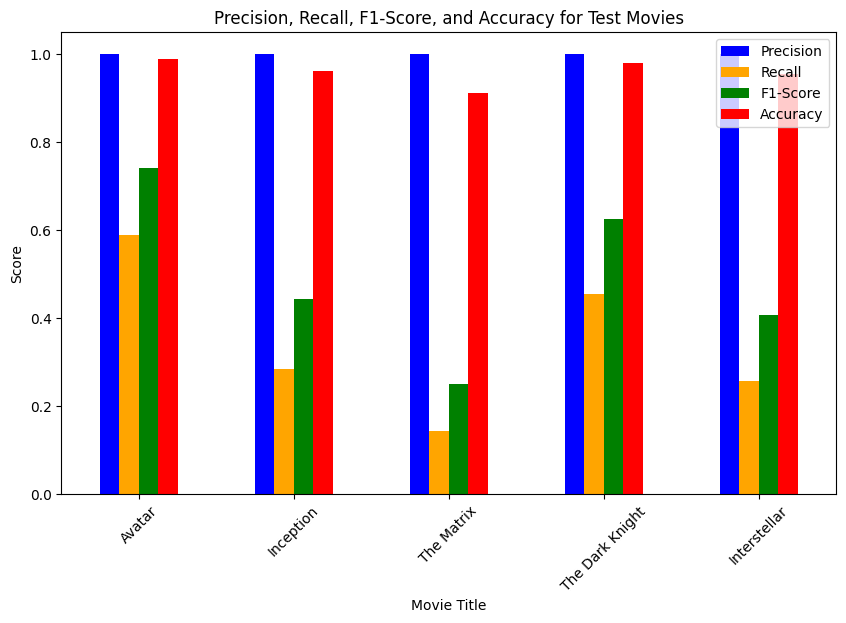

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings

# Ignore warnings
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')

# Load your dataset
data = pd.read_csv('main_data.csv')

# Generate mock labels if you don't have actual labels
data['true_label'] = np.random.choice([0, 1], size=len(data))

# Function to create the similarity matrix using TF-IDF based on genres (or added features)
def create_similarity(train_data):
    tfidf = TfidfVectorizer(tokenizer=lambda x: x.split())  # Use space-separated genre tokens
    count_matrix = tfidf.fit_transform(train_data['comb'])  # Convert genres to TF-IDF matrix
    similarity = cosine_similarity(count_matrix)  # Compute cosine similarity
    return similarity

# Recommendation function based on cosine similarity
def rcmd(movie_title, train_data, similarity, num_recommendations=10):
    movie_title = movie_title.lower()
    
    # Check if the movie exists in the training data
    if movie_title not in train_data['movie_title'].unique():
        return []
    else:
        i = train_data.loc[train_data['movie_title'] == movie_title].index[0]
        if i >= similarity.shape[0]:  # Prevent index out of bounds error
            return []
        
        lst = list(enumerate(similarity[i]))
        lst = sorted(lst, key=lambda x: x[1], reverse=True)
        lst = lst[1:num_recommendations + 1]  # Exclude the first item (the movie itself)
        recommended_movies = [train_data['movie_title'].iloc[i[0]] for i in lst if i[1] > 0]  # Filter out zero similarities
        return recommended_movies

# Function to test recommendations for a specific movie title and compute precision, recall, F1-score, and accuracy
def test_single_movie_with_precision_recall(movie_title, data, test_size=0.2):
    # Adjust the train-test split by modifying the test_size parameter
    train_data, test_data = train_test_split(data, test_size=test_size, random_state=42)
    similarity = create_similarity(train_data)
    
    # Get top 10 recommendations for the specified movie title
    recommended_movies = rcmd(movie_title, train_data, similarity, num_recommendations=10)
    
    # Find the relevant movies in the test set (actual labels)
    relevant_movies = test_data[test_data['true_label'] == 1]['movie_title'].values
    
    # Compare based on genre overlap (at least one similar genre)
    tp, fp, fn, tn = 0, 0, 0, 0  # True Positives, False Positives, False Negatives, True Negatives
    
    # Convert genres to sets for easier comparison
    train_data['genre_set'] = train_data['genres'].apply(lambda x: set(x.split()))
    test_data['genre_set'] = test_data['genres'].apply(lambda x: set(x.split()))
    
    # Check for True Positives and False Positives
    for movie in recommended_movies:
        if movie in train_data['movie_title'].values:
            recommended_genres = train_data[train_data['movie_title'] == movie]['genre_set'].values[0]
            relevant_movie = any(
                recommended_genres & test_data[test_data['movie_title'] == relevant_movie]['genre_set'].values[0]
                for relevant_movie in relevant_movies
            )
            if relevant_movie:
                tp += 1  # True Positive: At least one genre matches
            else:
                fp += 1  # False Positive: No genres match
    
    # False Negatives: Relevant movies not recommended
    for relevant_movie in relevant_movies:
        relevant_genres = test_data[test_data['movie_title'] == relevant_movie]['genre_set'].values[0]
        not_recommended = all(
            not (relevant_genres & train_data[train_data['movie_title'] == movie]['genre_set'].values[0])
            for movie in recommended_movies
        )
        if not_recommended:
            fn += 1  # False Negative: No recommended movie matches
    
    # True Negatives (Movies neither recommended nor relevant)
    all_movies_in_test = set(test_data['movie_title'].values)
    irrelevant_movies = all_movies_in_test - set(relevant_movies)
    tn = len(irrelevant_movies - set(recommended_movies))
    
    # Precision, Recall, F1-Score, and Accuracy Calculations
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    accuracy = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) > 0 else 0
    
    return recommended_movies, precision, recall, f1_score, accuracy

# List of movies to test
test_movies = ["Avatar", "Inception", "The Matrix", "The Dark Knight", "Interstellar"]

# Store results for precision, recall, F1-score, and accuracy
results = {
    'Movie': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'Accuracy': [],
    'Recommended Movies': []
}

# Test each movie and collect precision, recall, F1-score, accuracy, and top 10 recommended movies
for movie in test_movies:
    recommended_movies, precision, recall, f1_score, accuracy = test_single_movie_with_precision_recall(movie, data, test_size=0.2)
    results['Movie'].append(movie)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1_score)
    results['Accuracy'].append(accuracy)
    results['Recommended Movies'].append(", ".join(recommended_movies))  # Join movie titles for easy display

# Convert results to a DataFrame for easy visualization
results_df = pd.DataFrame(results)

# Display the table with results and recommended movies
print(results_df)

# Plot a bar chart for Precision, Recall, F1-Score, and Accuracy for each movie
results_df.plot(x='Movie', kind='bar', figsize=(10, 6), title='Precision, Recall, F1-Score, and Accuracy for Test Movies', color=['blue', 'orange', 'green', 'red'])
plt.ylabel('Score')
plt.xlabel('Movie Title')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.show()
